In [34]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [35]:
sumnozone = pd.read_csv(
    'Ozone_summary_2020.csv', 
    index_col='Date Local',
    parse_dates=["Date Local"],
)
sumnozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 247653 entries, 2020-02-29 to 2020-05-25
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           247653 non-null  int64  
 1   County Code          247653 non-null  int64  
 2   Site Num             247653 non-null  int64  
 3   Parameter Code       247653 non-null  int64  
 4   POC                  247653 non-null  int64  
 5   Latitude             247653 non-null  float64
 6   Longitude            247653 non-null  float64
 7   Datum                247653 non-null  object 
 8   Parameter Name       247653 non-null  object 
 9   Sample Duration      247653 non-null  object 
 10  Pollutant Standard   247653 non-null  object 
 11  Units of Measure     247653 non-null  object 
 12  Event Type           247653 non-null  object 
 13  Observation Count    247653 non-null  int64  
 14  Observation Percent  247653 non-null  float64
 15  A

In [36]:
datemask = sumnozone.loc['2020-06-01':'2020-12-31']
datemask['Arithmetic Mean'].describe()  # min=0 no negative value, but the largest number is 0.12 ppm
# datemask['AQI'].describe() # min=o no negative value
# print(datemask["County Name"].unique())
# print(datemask['State Name'].unique())

count    93233.000000
mean         0.032503
std          0.011150
min          0.000000
25%          0.024412
50%          0.031882
75%          0.040176
max          0.121000
Name: Arithmetic Mean, dtype: float64

605
52



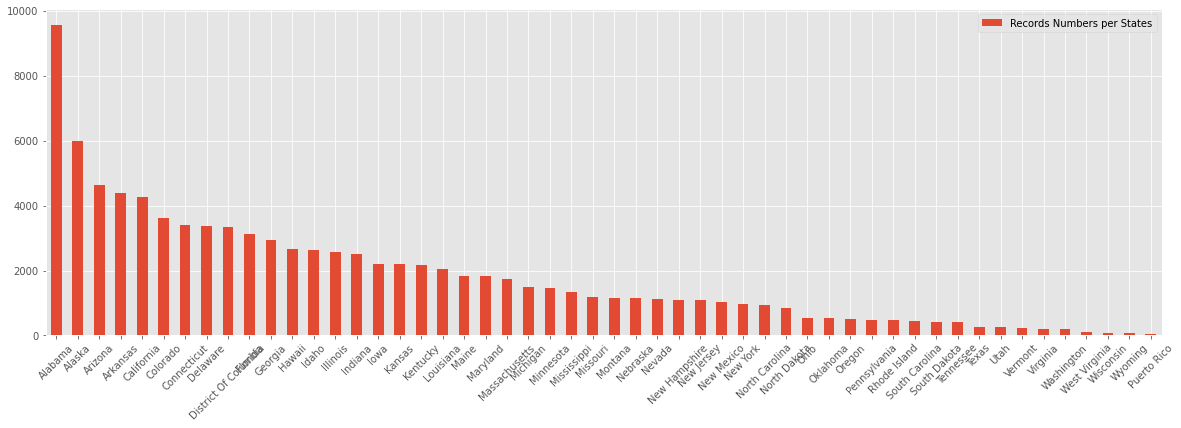

In [27]:
counties = datemask["County Name"].nunique()
print(counties)  #total 605 counties, more than counties in NO2 
states = datemask['State Name'].nunique()
print(states)  #Washington and Puerto Rico are not states, so total 50 states (all)

state = datemask["State Name"].value_counts().plot(kind='bar')
state.set_xticks(range(states))
state.set_xticklabels(datemask['State Name'].unique(), rotation=45)
state.legend(["Records Numbers per States"])
print()


State Name
Alabama                 13
Alaska                   2
Arizona                 10
Arkansas                 6
California              47
Colorado                18
Connecticut              8
Delaware                 3
District Of Columbia     1
Florida                 35
Georgia                 19
Hawaii                   1
Idaho                    4
Illinois                23
Indiana                 27
Iowa                     9
Kansas                   8
Kentucky                25
Louisiana               18
Maine                   10
Maryland                15
Massachusetts           13
Michigan                23
Minnesota               15
Mississippi              9
Missouri                17
Montana                  8
Nebraska                 3
Nevada                   6
New Hampshire            7
New Jersey              15
New Mexico               9
New York                24
North Carolina          30
North Dakota             9
Ohio                    34
Oklahoma         

<AxesSubplot:xlabel='State Name'>

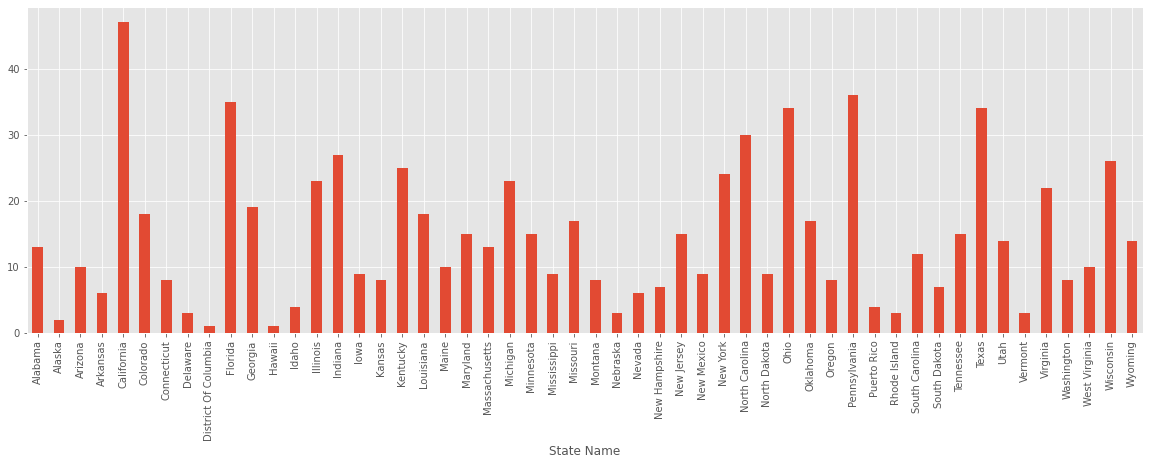

In [28]:
uniqcoun = datemask.groupby('State Name')['County Name'].nunique()
print(uniqcoun)
uniqcoun.plot(kind='bar')

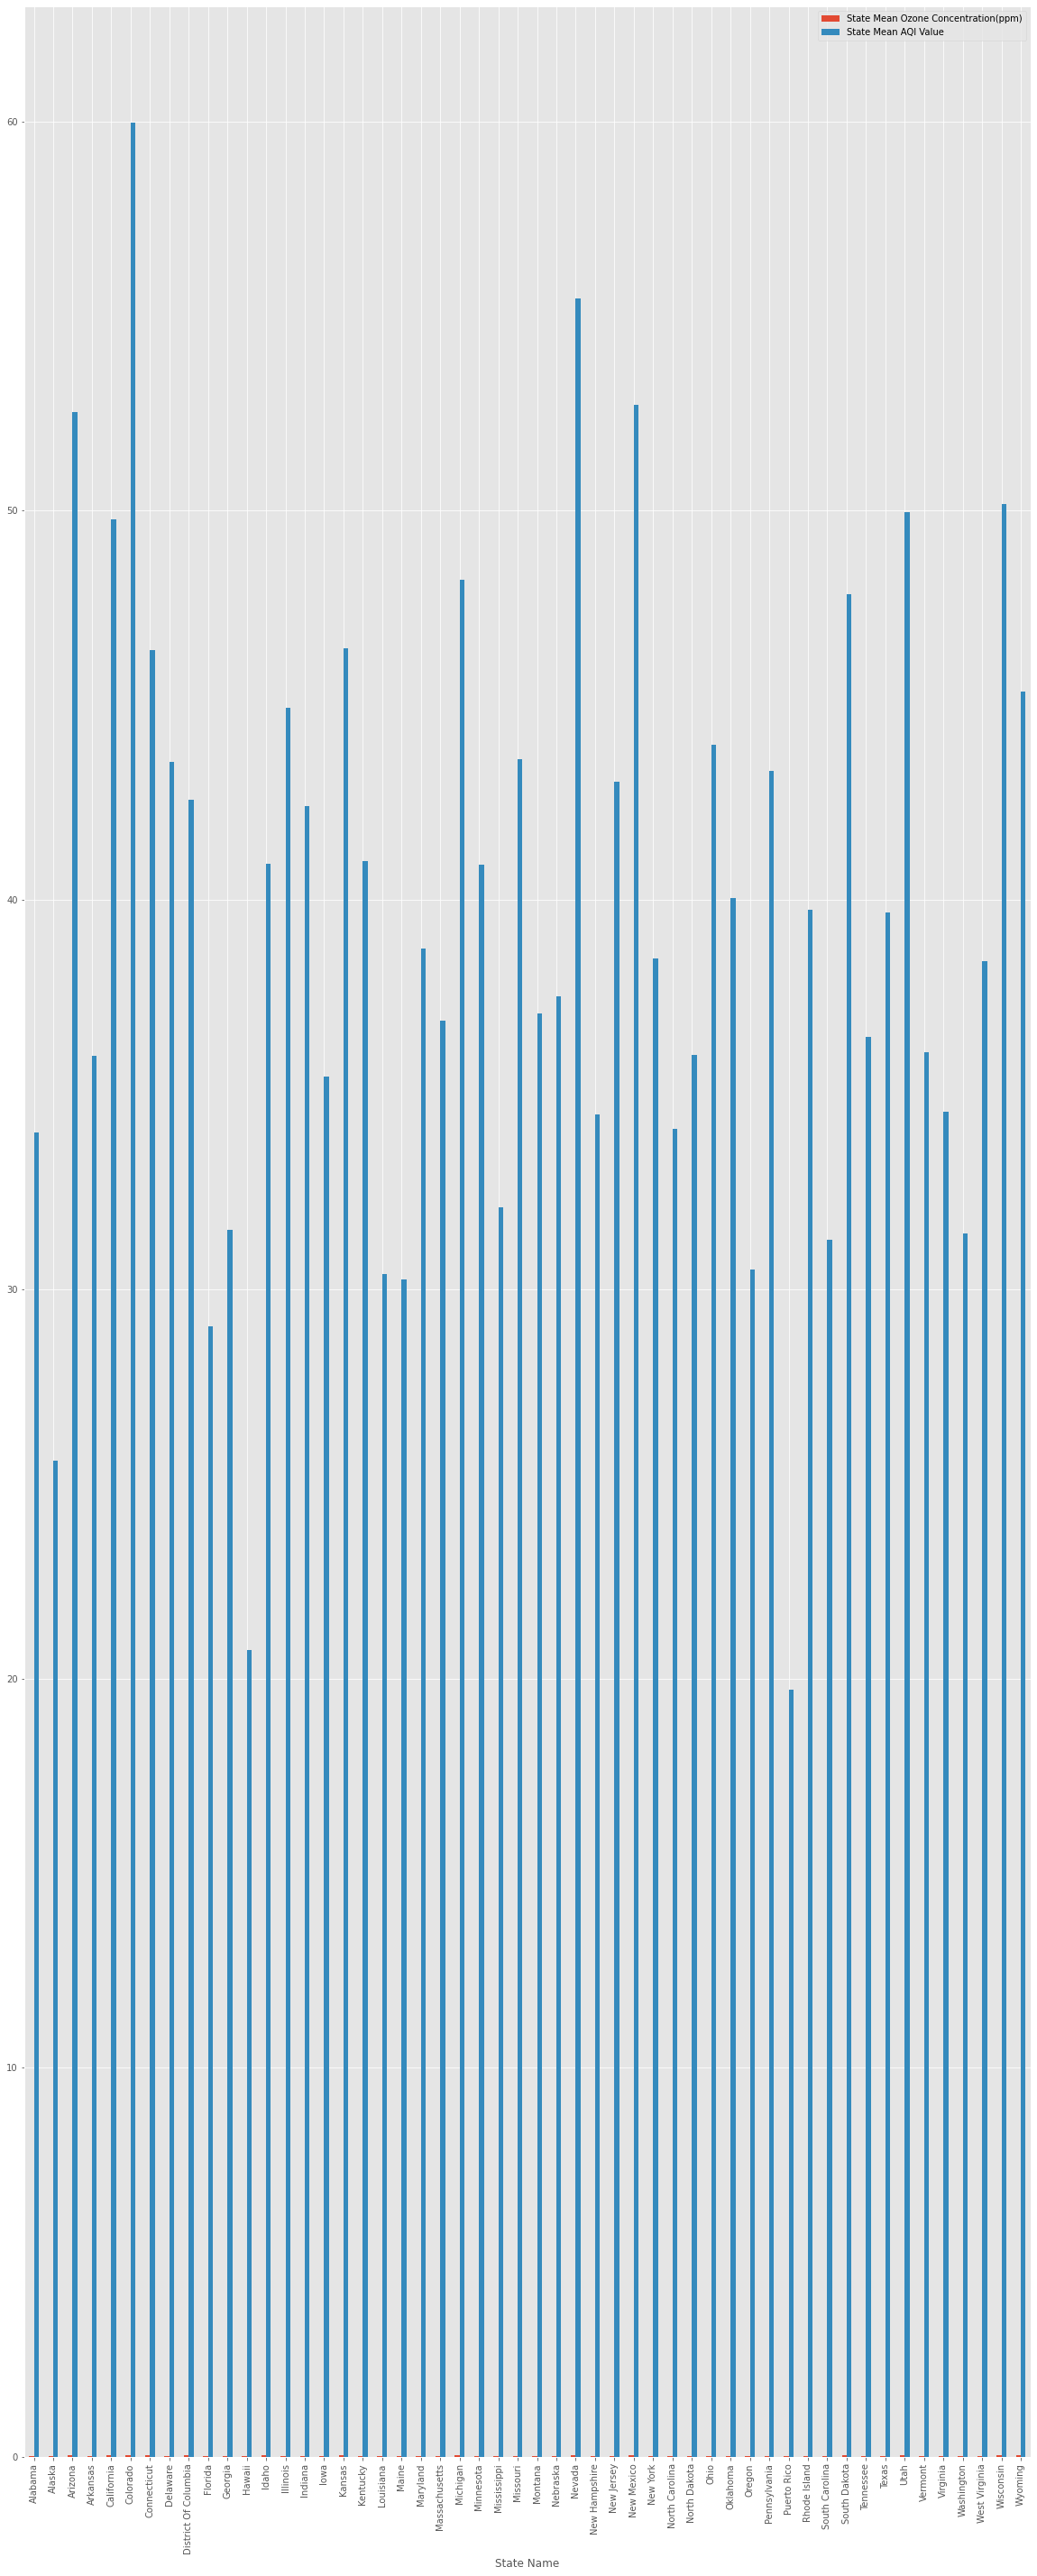

In [33]:
allstate = datemask.groupby('State Name')
stateozone = allstate['Arithmetic Mean'].mean()
stateozone
stateaqi = allstate['AQI'].mean()
ax = pd.concat([stateozone, stateaqi], axis=1).plot(kind='bar')
ax.set_xticks(range(len(allstate)))
ax.set_xticklabels(allstate.groups.keys(), rotation=90)
ax.legend(["State Mean Ozone Concentration(ppm)", "State Mean AQI Value"])
print()

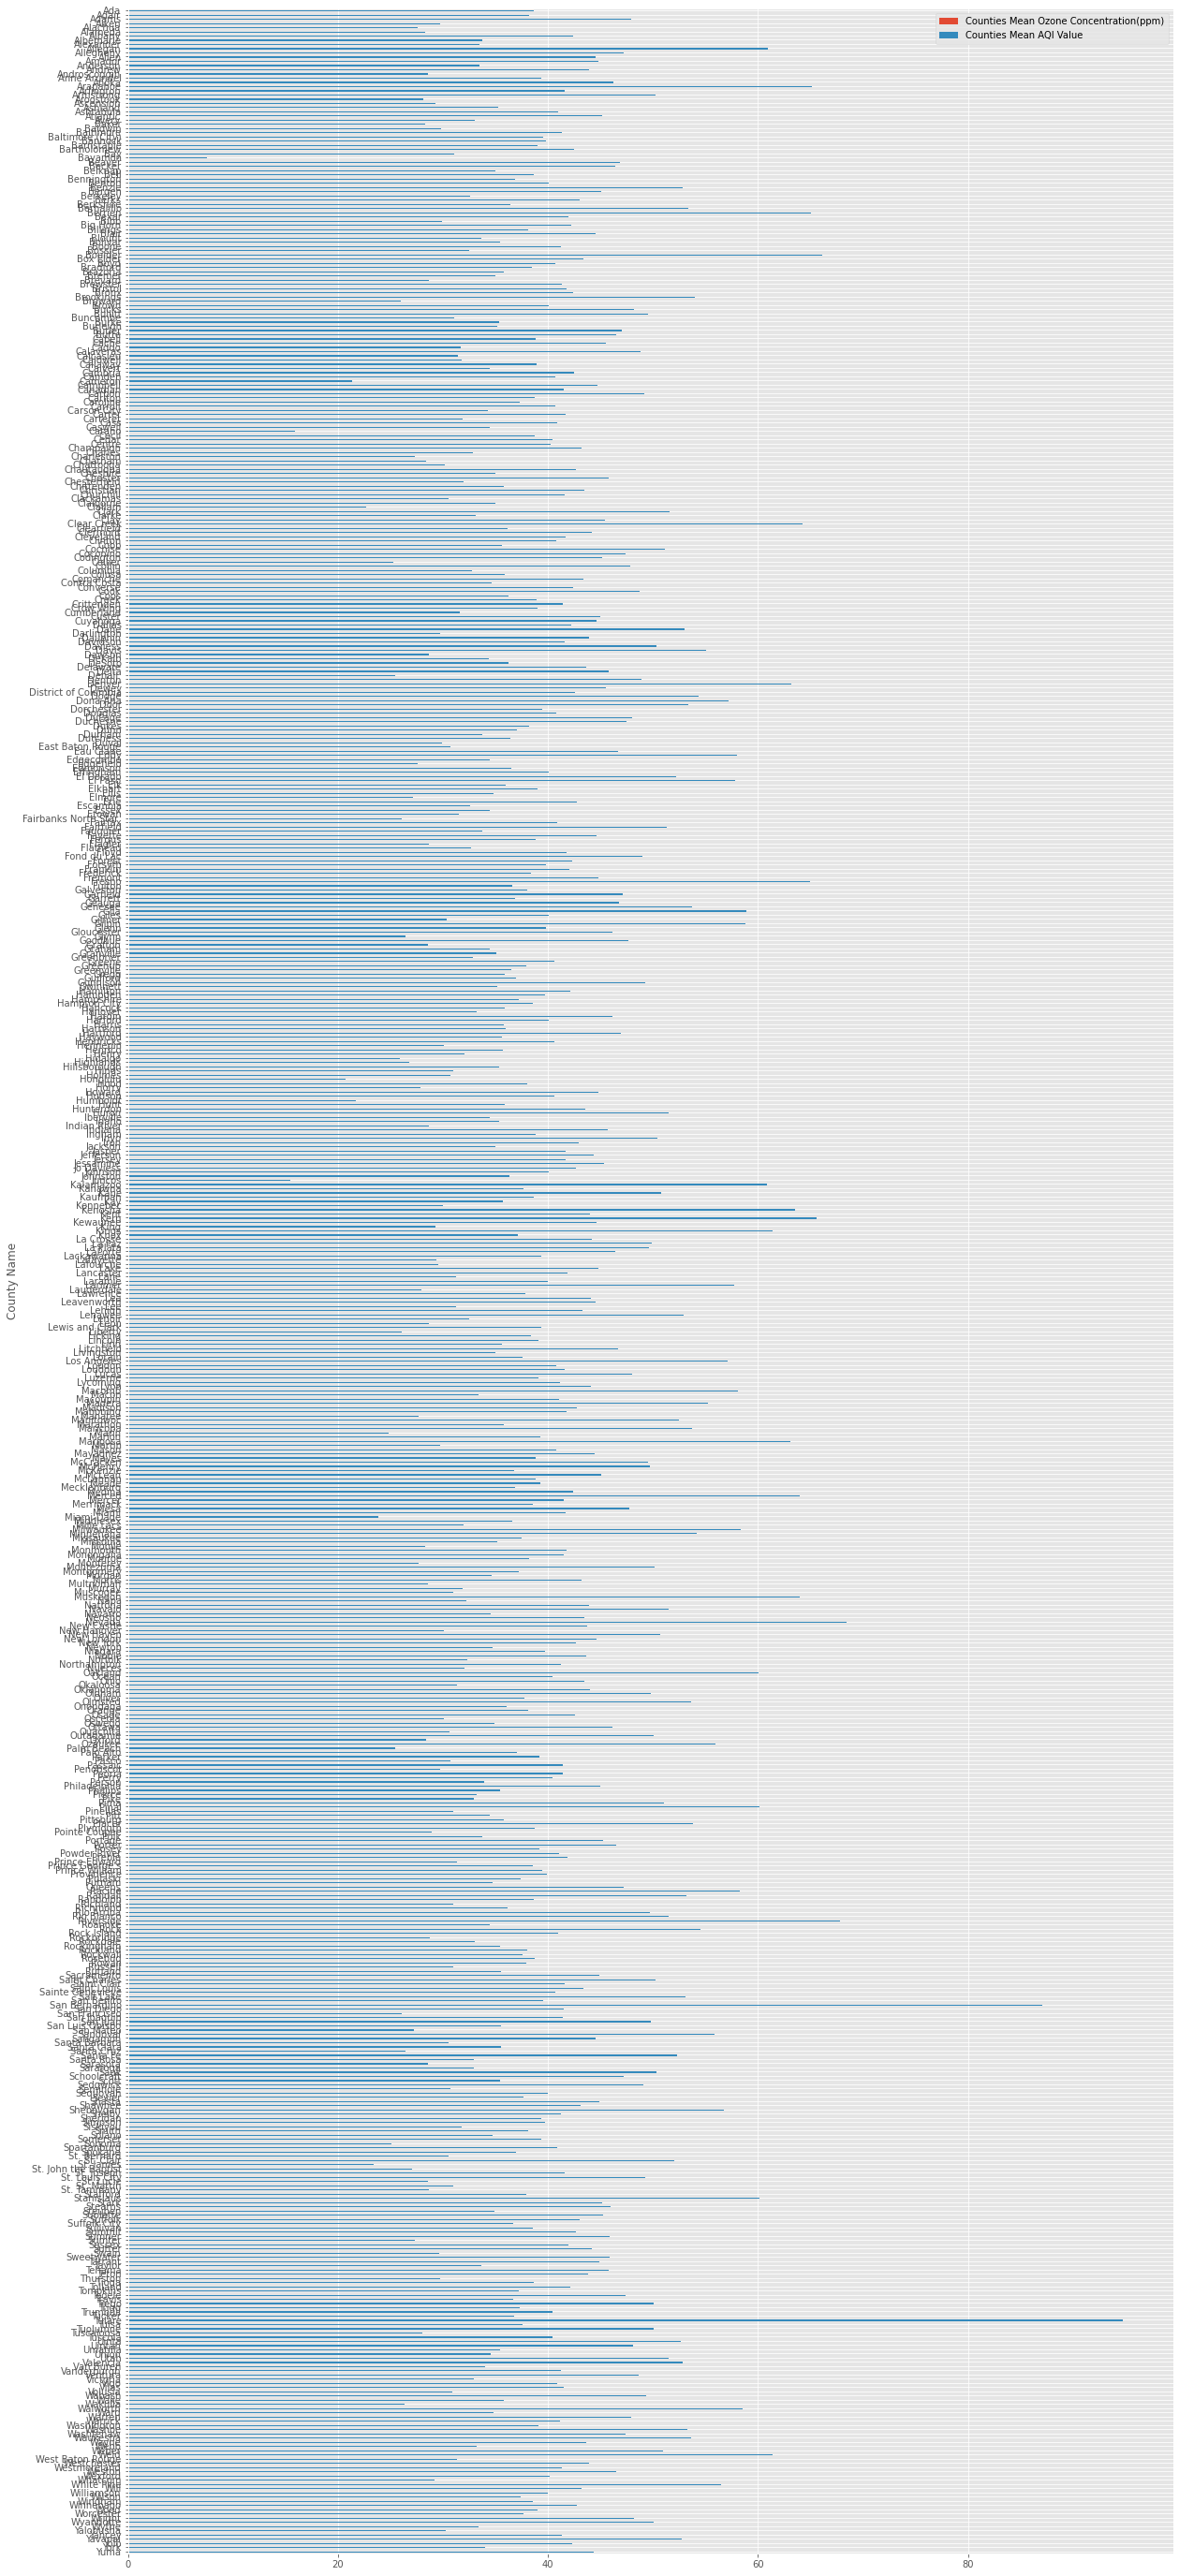

In [30]:
plt.rcParams['figure.figsize'] = (20, 50)
allcounties = datemask.sort_values('County Name').groupby('County Name')
countiesozone = allcounties['Arithmetic Mean'].mean()
countiesaqi = allcounties['AQI'].mean()
df = pd.concat([countiesozone, countiesaqi], axis=1)
ax2 = df.plot(kind='barh')
ax2.set_yticks(range(len(allcounties)))
ax2.set_yticklabels(allcounties.groups.keys(), rotation=0)
ax2.invert_yaxis()
ax2.legend(["Counties Mean Ozone Concentration(ppm)", "Counties Mean AQI Value"])
print()